In [1]:
import pandas as pd
from google.colab import files

# Fazendo upload do arquivo
uploaded = files.upload()

# Agora vamos assumir que o arquivo é chamado 'eas_info_br.xlsx'
file_name = "eas_info_br.xlsx"

# Carregando o arquivo Excel
# Se houver várias folhas e você quiser carregar uma folha específica, você pode passar o parâmetro sheet_name='nome_da_folha'
df = pd.read_excel(file_name)

# Ver as primeiras linhas dos dados
print(df.head())

# Ver informações gerais sobre os dados
print(df.info())


Saving eas_info_br.xlsx to eas_info_br.xlsx
           created_at                   id               id_str  \
0 2023-01-11 00:14:06  1612966041851760896  1612966041851760642   
1 2023-01-11 00:12:35  1612965659427700992  1612965659427700737   
2 2023-01-10 23:54:44  1612961170008293120  1612961170008293381   
3 2023-01-10 23:38:49  1612957161801321984  1612957161801322499   
4 2023-01-10 23:18:27  1612952035883613952  1612952035883614208   

                                           full_text  truncated  \
0  🚨10.01.23 BRASILIA – DF\nGEPF\n6 pm\nCleuza Da...      False   
1  🚨10.01.23  BRASÍLIA – DF \nGEPF\n18h\nCleuza D...      False   
2  @oproprioDiogo Que sejam separadamente identif...      False   
3  🚨 Urgente\n\nSegundo advogados em Brasília, no...      False   
4  🚨10.01.23  BRASÍLIA – DF \nGEPF\n18h\nUma pess...      False   

   display_text_range  entities  \
0                 212       NaN   
1                 216       NaN   
2                 220       NaN   
3         

In [2]:
# Obtendo estatísticas descritivas para os atributos numéricos
descriptive_statistics = df.describe()

# Exibindo as estatísticas descritivas
print(descriptive_statistics)


                          created_at            id        id_str  \
count                           3094  3.094000e+03  3.094000e+03   
mean   2022-12-16 10:25:12.753070592  1.603698e+18  1.603698e+18   
min              2022-11-26 16:57:58  1.596549e+18  1.596549e+18   
25%    2022-12-04 22:59:20.750000128  1.599539e+18  1.599539e+18   
50%       2022-12-15 23:06:12.500000  1.603527e+18  1.603527e+18   
75%              2022-12-27 18:53:36  1.607812e+18  1.607812e+18   
max              2023-01-11 00:14:06  1.612966e+18  1.612966e+18   
std                              NaN  4.536762e+15  4.536762e+15   

       display_text_range  entities  in_reply_to_status_id  \
count         3094.000000       0.0           3.160000e+02   
mean           148.598578       NaN           1.601564e+18   
min              0.000000       NaN           1.596617e+18   
25%            100.000000       NaN           1.598697e+18   
50%            140.000000       NaN           1.600183e+18   
75%            

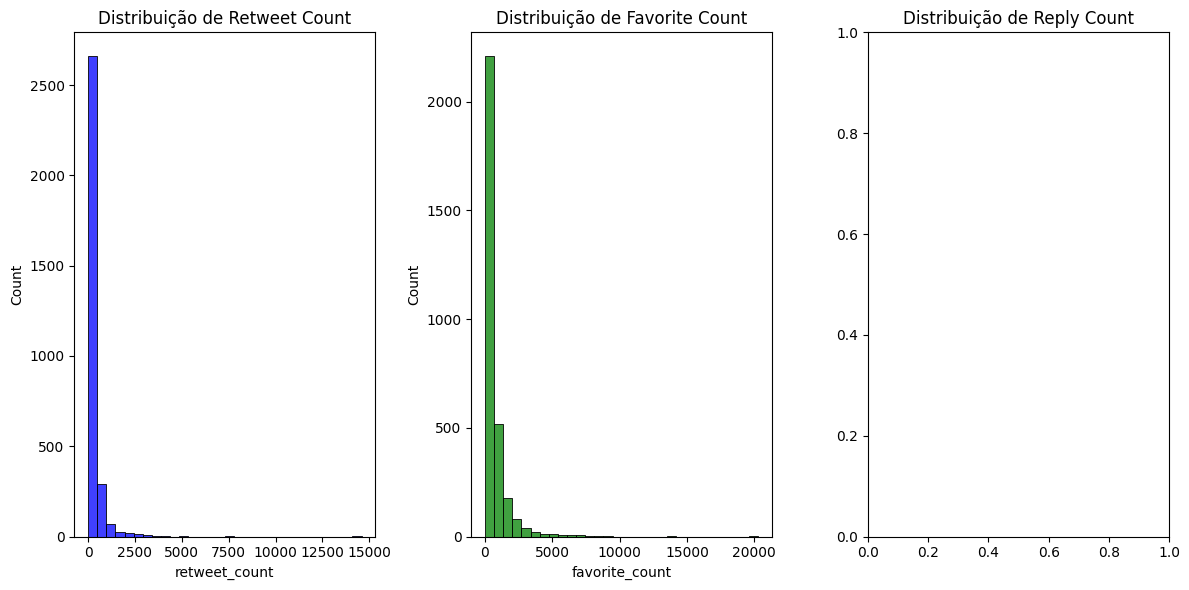

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho da figura para melhor visualização
plt.figure(figsize=(12, 6))

# Histograma para 'retweet_count'
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, 1º gráfico
sns.histplot(df['retweet_count'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribuição de Retweet Count')

# Histograma para 'favorite_count'
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, 2º gráfico
sns.histplot(df['favorite_count'].dropna(), bins=30, kde=False, color='green')
plt.title('Distribuição de Favorite Count')

# Histograma para 'reply_count'
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, 3º gráfico
sns.histplot(df['reply_count'].dropna(), bins=30, kde=False, color='red')
plt.title('Distribuição de Reply Count')

plt.tight_layout()
plt.show()


In [7]:
# Supondo que o DataFrame já foi carregado e é chamado de df
# Vamos remover as colunas que possuem todos os valores como NaN

# Lista das colunas antes da limpeza para referência futura
original_columns = df.columns.tolist()

# Encontrar colunas onde todos os valores são NaN
empty_columns = df.columns[df.isna().all()].tolist()

# Remover as colunas vazias
df_cleaned = df.drop(columns=empty_columns)

# Listar as colunas removidas
print("Colunas removidas porque contêm apenas valores NaN:")
print(empty_columns)

# Exibir informações do DataFrame após a limpeza
print("\nInformações do DataFrame após a limpeza:")
print(df_cleaned.info())

# O DataFrame df_cleaned agora contém apenas as colunas com dados


Colunas removidas porque contêm apenas valores NaN:
['entities', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_permalink', 'quoted_status', 'favorited_by', 'scopes', 'display_text_width', 'retweeted_status', 'quote_count', 'timestamp_ms', 'reply_count', 'filter_level', 'metadata', 'query', 'withheld_scope', 'withheld_copyright', 'withheld_in_countries', 'possibly_sensitive_appealable']

Informações do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 3094 non-null   datetime64[ns]
 1   id                         3094 non-null   int64         
 2   id_str                     3094 non-null   int64         
 3   full_text                  3094 non-null   object        
 4   truncated                  3094 non-null   bool          
 5   

In [11]:
# Lista para manter o registro das colunas excluídas
excluded_columns_cleaned = []

# Colunas idênticas que podem ser excluídas: ('id_str' mantido, 'text' excluído se duplicado)
columns_to_exclude_cleaned = ['id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'quoted_status_id']

# Excluindo colunas duplicadas no DataFrame limpo e adicionando-as à lista de colunas excluídas
for col in columns_to_exclude_cleaned:
    if col in df_cleaned.columns:  # Verificando se a coluna existe antes de tentar excluí-la
        excluded_columns_cleaned.append(col)
        df_cleaned.drop(col, axis=1, inplace=True)

# Checando se 'full_text' e 'text' são duplicados no DataFrame limpo
if 'full_text' in df_cleaned.columns and 'text' in df_cleaned.columns and df_cleaned['full_text'].equals(df_cleaned['text']):
    excluded_columns_cleaned.append('text')
    df_cleaned.drop('text', axis=1, inplace=True)

# Listando as colunas excluídas do DataFrame limpo
print("Colunas excluídas do DataFrame limpo por serem duplicadas ou desnecessárias para a análise:")
print(excluded_columns_cleaned)

# Exibir informações do DataFrame limpo após a exclusão de colunas
print(df_cleaned.info())


Colunas excluídas do DataFrame limpo por serem duplicadas ou desnecessárias para a análise:
['id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'quoted_status_id', 'text']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 3094 non-null   datetime64[ns]
 1   id_str                     3094 non-null   int64         
 2   full_text                  3094 non-null   object        
 3   truncated                  3094 non-null   bool          
 4   display_text_range         3094 non-null   int64         
 5   source                     3094 non-null   object        
 6   in_reply_to_status_id_str  316 non-null    float64       
 7   in_reply_to_user_id_str    317 non-null    float64       
 8   in_reply_to_screen_name    317 non-null    object        
 9   is_quote_status     

In [12]:
# Nome do novo arquivo CSV
cleaned_file_name = 'cleaned_twitter_data.csv'

# Salvar o DataFrame limpo em um novo arquivo CSV
df_cleaned.to_csv(cleaned_file_name, index=False)

print(f"DataFrame limpo salvo como '{cleaned_file_name}'.")


DataFrame limpo salvo como 'cleaned_twitter_data.csv'.


In [13]:
# Importando as bibliotecas necessárias
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame limpo em df_cleaned
# Caso ainda precise carregar, substitua 'cleaned_twitter_data.csv' pelo caminho correto do seu arquivo
df_cleaned = pd.read_csv('cleaned_twitter_data.csv')

# Obtendo estatísticas descritivas para as colunas numéricas
descriptive_statistics = df_cleaned.describe()

# Exibindo as estatísticas descritivas
print(descriptive_statistics)

# Para obter estatísticas descritivas incluindo variáveis categóricas e outros tipos
full_descriptive_statistics = df_cleaned.describe(include='all')

# Mostrando estatísticas descritivas completas, incluindo contagens de valores únicos, top e freq para dados não numéricos
print(full_descriptive_statistics)

# Se quiser visualizar as estatísticas de colunas específicas, como 'retweet_count' ou 'favorite_count'
print("Estatísticas de Retweet Count:")
print(df_cleaned['retweet_count'].describe())

print("\nEstatísticas de Favorite Count:")
print(df_cleaned['favorite_count'].describe())


             id_str  display_text_range  in_reply_to_status_id_str  \
count  3.094000e+03         3094.000000               3.160000e+02   
mean   1.603698e+18          148.598578               1.601564e+18   
std    4.536762e+15           68.169241               3.839602e+15   
min    1.596549e+18            0.000000               1.596617e+18   
25%    1.599539e+18          100.000000               1.598697e+18   
50%    1.603527e+18          140.000000               1.600183e+18   
75%    1.607812e+18          197.000000               1.603523e+18   
max    1.612966e+18          297.000000               1.612955e+18   

       in_reply_to_user_id_str  retweet_count  favorite_count  \
count             3.170000e+02    3094.000000     3094.000000   
mean              1.069309e+18     285.902392      641.936975   
std               6.166882e+17     503.202832     1055.566507   
min               2.077285e+07       0.000000        0.000000   
25%               8.626787e+17      88.00000

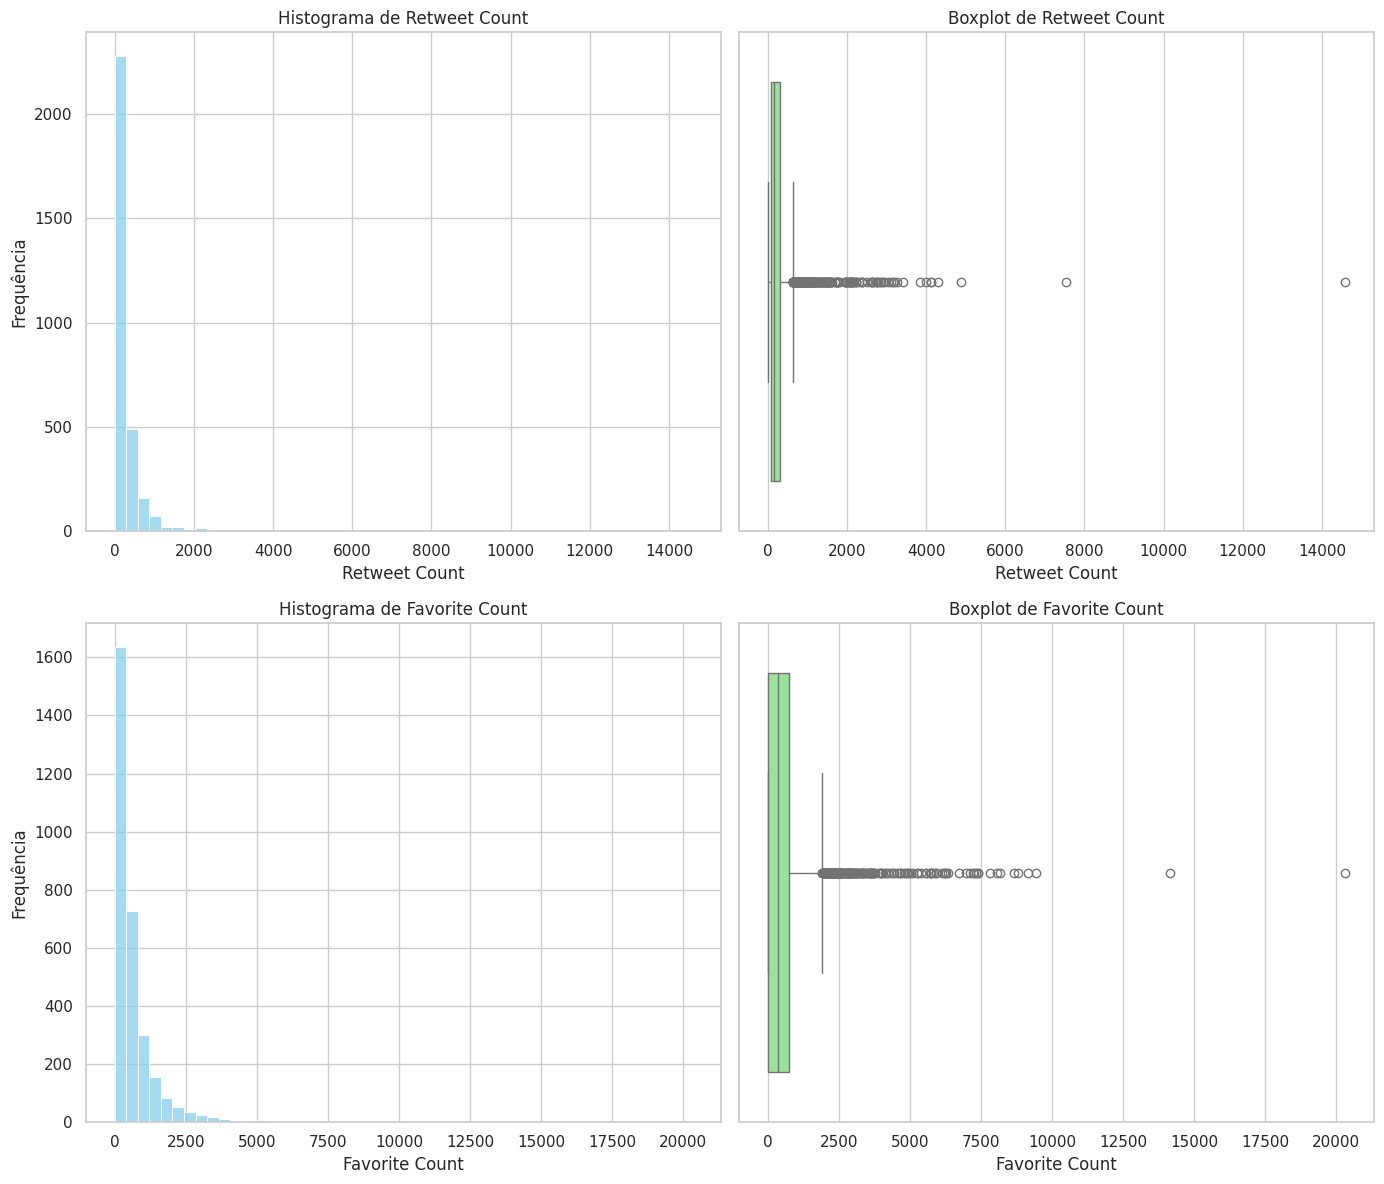

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo visual dos gráficos
sns.set(style="whitegrid")

# Criando uma figura e um conjunto de subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Histograma de Retweet Count
sns.histplot(df_cleaned['retweet_count'], bins=50, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histograma de Retweet Count')
axes[0, 0].set_xlabel('Retweet Count')
axes[0, 0].set_ylabel('Frequência')

# Boxplot de Retweet Count
sns.boxplot(x=df_cleaned['retweet_count'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot de Retweet Count')
axes[0, 1].set_xlabel('Retweet Count')

# Histograma de Favorite Count
sns.histplot(df_cleaned['favorite_count'], bins=50, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Histograma de Favorite Count')
axes[1, 0].set_xlabel('Favorite Count')
axes[1, 0].set_ylabel('Frequência')

# Boxplot de Favorite Count
sns.boxplot(x=df_cleaned['favorite_count'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Boxplot de Favorite Count')
axes[1, 1].set_xlabel('Favorite Count')

plt.tight_layout()
plt.show()


In [15]:
# Função para calcular os outliers baseado no IQR
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return data[(data < lower_bound) | (data > upper_bound)]

# Detectando outliers em Retweet Count e Favorite Count
retweet_outliers = detect_outliers(df_cleaned['retweet_count'])
favorite_outliers = detect_outliers(df_cleaned['favorite_count'])

print("Outliers em Retweet Count:")
print(retweet_outliers)

print("\nOutliers em Favorite Count:")
print(favorite_outliers)


Outliers em Retweet Count:
3        686
14      2294
15      2608
19       782
22      1941
        ... 
3049    2389
3051     821
3065    3039
3078    2099
3093    2744
Name: retweet_count, Length: 298, dtype: int64

Outliers em Favorite Count:
14      5578
15      7111
22      5268
24      4779
36      3689
        ... 
3015    2460
3041    2258
3065    7391
3078    4928
3093    6206
Name: favorite_count, Length: 203, dtype: int64


In [16]:
# Encontrando os tweets com altos valores de engajamento
high_engagement_tweets = df_cleaned[df_cleaned['retweet_count'] >= retweet_outliers.min()]

# Imprimindo alguns dos tweets com maior engajamento
print("\nTweets com Alto Engajamento:")
print(high_engagement_tweets[['full_text', 'retweet_count', 'favorite_count']].head())



Tweets com Alto Engajamento:
                                            full_text  retweet_count  \
3   🚨 Urgente\n\nSegundo advogados em Brasília, no...            686   
14  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...           2294   
15  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...           2608   
19  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            782   
22  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...           1941   

    favorite_count  
3             1531  
14            5578  
15            7111  
19            1574  
22            5268  


In [17]:
# Extraindo os tweets com alto engajamento baseado em retweets
high_retweet_tweets = df_cleaned[df_cleaned['retweet_count'].isin(retweet_outliers)]

# Extraindo os tweets com alto engajamento baseado em favoritos
high_favorite_tweets = df_cleaned[df_cleaned['favorite_count'].isin(favorite_outliers)]

# Analisando os conteúdos dos tweets com alto retweet
print("Alguns dos Tweets com Alto Número de Retweets:")
print(high_retweet_tweets[['full_text', 'retweet_count']].head())

# Analisando os conteúdos dos tweets com alto favorite
print("\nAlguns dos Tweets com Alto Número de Favoritos:")
print(high_favorite_tweets[['full_text', 'favorite_count']].head())


Alguns dos Tweets com Alto Número de Retweets:
                                            full_text  retweet_count
3   🚨 Urgente\n\nSegundo advogados em Brasília, no...            686
14  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...           2294
15  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...           2608
19  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            782
22  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...           1941

Alguns dos Tweets com Alto Número de Favoritos:
                                            full_text  favorite_count
14  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            5578
15  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            7111
22  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            5268
24  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            4779
36  🚨10.01.23  BRASÍLIA – DF \nGinásio de Esporte ...            3689


In [18]:
# Aumentando o número máximo de colunas exibidas
pd.set_option('display.max_columns', None)

# Aumentando a largura máxima das colunas para que o texto completo seja mostrado
pd.set_option('display.max_colwidth', None)

# Carregando o DataFrame (se ainda não estiver carregado)
df_cleaned = pd.read_csv('cleaned_twitter_data.csv')

# Filtrando para os tweets com mais retweets
top_retweets = df_cleaned[df_cleaned['retweet_count'].isin(retweet_outliers)]

# Filtrando para os tweets com mais favoritos
top_favorites = df_cleaned[df_cleaned['favorite_count'].isin(favorite_outliers)]

# Mostrando os tweets com mais retweets
print("Tweets com mais Retweets:")
print(top_retweets[['full_text', 'retweet_count']].sort_values(by='retweet_count', ascending=False).head())

# Mostrando os tweets com mais favoritos
print("\nTweets com mais Favoritos:")
print(top_favorites[['full_text', 'favorite_count']].sort_values(by='favorite_count', ascending=False).head())


Tweets com mais Retweets:
                                                                                                                                                                                                                                                     full_text  \
2726                                                                                                              RT @MatthewTyrmand: Thank you @TuckerCarlson for being the one major media show host who sees the import of what is going on in🇧🇷. These ar…   
2922                                                                                                                 RT @AleGZahra38: 29.11.22🇧🇷\n🚨 30° dia  🚨🇧🇷\nFoco !\nComando Militar do Sudeste, SP.\n@FoxNews \n@foxnewspolitics https://t.co/km463sMxtJ   
316                                                           🚨03.01.23 ⌛️65° dia! 📍 BRASÍLIA – DF QGEX\n⌚️+-  18h  \nAs manifestações continuam em frente aos QGs das FFAA.\n@exercitooficial @marmilbr

In [19]:
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk

# Certifique-se de que as stopwords estão disponíveis
nltk.download('stopwords')

# Stopwords em português
stop_words = set(stopwords.words('portuguese'))

def clean_text(text):
    """Função para limpar o texto dos tweets."""
    text = re.sub(r"http\S+", "", text)  # Remoção de URLs
    text = re.sub(r"@\S+", "", text)  # Remoção de menções
    text = re.sub(r"#\S+", "", text)  # Remoção de hashtags
    text = re.sub(r"[^A-Za-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ ]", "", text)  # Removendo caracteres especiais
    text = text.lower()  # Convertendo para minúsculo
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Removendo stopwords
    return text

def get_sentiment(text):
    """Função para obter a polaridade de sentimentos do texto."""
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Retorna a polaridade

# Carregando dados limpos
df = pd.read_csv('cleaned_twitter_data.csv')

# Aplicando a limpeza de texto
df['cleaned_text'] = df['full_text'].apply(clean_text)

# Aplicando a análise de sentimentos
df['sentiment_polarity'] = df['cleaned_text'].apply(get_sentiment)

# Salvando os resultados
df.to_csv('twitter_data_with_sentiments.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                                                                                                                                                                                                                                                                     full_text  \
0                                                             🚨10.01.23 BRASILIA – DF\nGEPF\n6 pm\nCleuza Dantas, 72 years old, "did you know that you are being called a terrorist by the press"\n@exercitooficial @NBCNews @cbstv @cbsnews @abc7ny @abcnews @foxtv @foxnews @nytimes https://t.co/ouThTtzXDG   
1                                                         🚨10.01.23  BRASÍLIA – DF \nGEPF\n18h\nCleuza Dantas 72 "a senhora sabia que a senhora está sendo chamada de terrorista pela imprensa" \n@exercitooficial @NBCNews @cbstv @cbsnews  @abc7ny @abcnews @foxtv @foxnews @nytimes https://t.co/DQusS3MZRk   
2                                                                                 

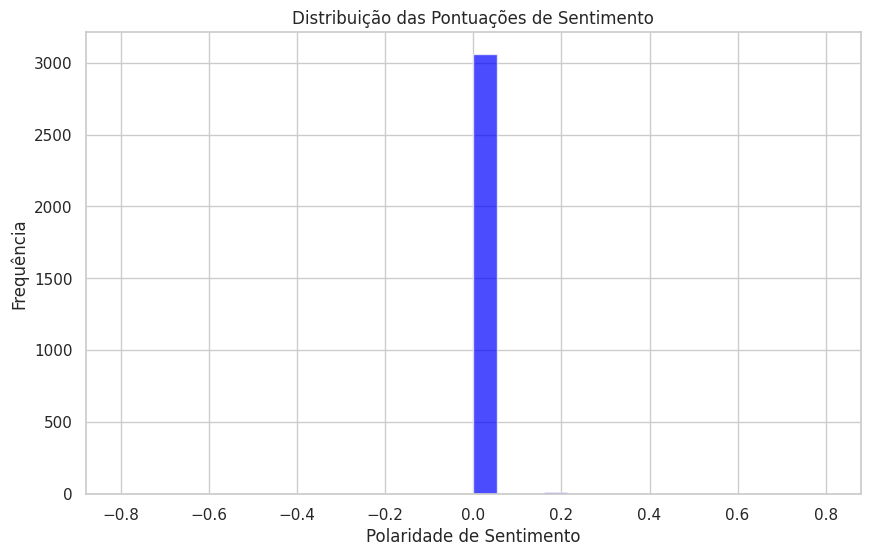

In [20]:
import pandas as pd

# Carregando os dados com as pontuações de sentimento
df_with_sentiments = pd.read_csv('twitter_data_with_sentiments.csv')

# Exibindo as primeiras entradas do DataFrame para ver as pontuações de sentimentos
print(df_with_sentiments[['full_text', 'cleaned_text', 'sentiment_polarity']].head())

# Resumo estatístico das pontuações de sentimentos
print("\nResumo Estatístico das Pontuações de Sentimento:")
print(df_with_sentiments['sentiment_polarity'].describe())

# Explorando a distribuição dos sentimentos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_with_sentiments['sentiment_polarity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribuição das Pontuações de Sentimento')
plt.xlabel('Polaridade de Sentimento')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [24]:
from collections import Counter

# Certifique-se de que o texto limpo seja uma string e não contenha valores NaN
df_with_sentiments['cleaned_text'] = df_with_sentiments['cleaned_text'].fillna('').astype(str)

# Tokenizando o texto e criando uma lista de palavras
words = df_with_sentiments['cleaned_text'].str.split().tolist()
words = [word for sublist in words for word in sublist if isinstance(word, str)]  # Filtrando para garantir que são strings

# Contando a frequência de cada palavra
word_counts = Counter(words)

# Exibindo as palavras mais comuns
most_common_words = word_counts.most_common(100)  # Ajuste o número conforme necessário
print("As palavras mais comuns e suas contagens:")
for word, count in most_common_words:
    print(f"{word}: {count}")


As palavras mais comuns e suas contagens:
dia: 2174
h: 1052
rt: 669
brasília: 587
frente: 511
sp: 477
país: 468
brasileiros: 459
df: 456
todo: 451
armadas: 432
forças: 427
milhões: 418
ajuda: 405
paulo: 396
militar: 396
comando: 368
qgex: 307
brasil: 288
cmse: 275
povo: 264
pedindo: 242
exército: 236
quartéis: 229
hoje: 205
rio: 204
rj: 190
janeiro: 186
qg: 179
manifestações: 172
sudeste: 170
retuitar: 159
ffaa: 156
qgs: 155
todos: 140
sc: 135
vídeo: 132
pessoas: 131
pedem: 130
dias: 128
pr: 127
bi: 127
sobre: 126
palácio: 126
cml: 124
porto: 117
agora: 115
alegre: 113
alienígena: 109
mg: 105
região: 105
alvorada: 103
belo: 100
grande: 98
horizonte: 95
rs: 89
curitiba: 88
forte: 85
vai: 82
opinião: 78
dezembro: 76
pessoa: 74
nan: 73
movimentação: 72
redes: 71
presidente: 69
salvem: 69
nacional: 68
intensificando: 68
hino: 68
caxias: 67
semana: 67
the: 66
ninguém: 64
vão: 64
duque: 64
cms: 62
campo: 59
manifestantes: 59
última: 59
pinheirinho: 59
fala: 58
brasilinvasão: 58
estados: 58
s

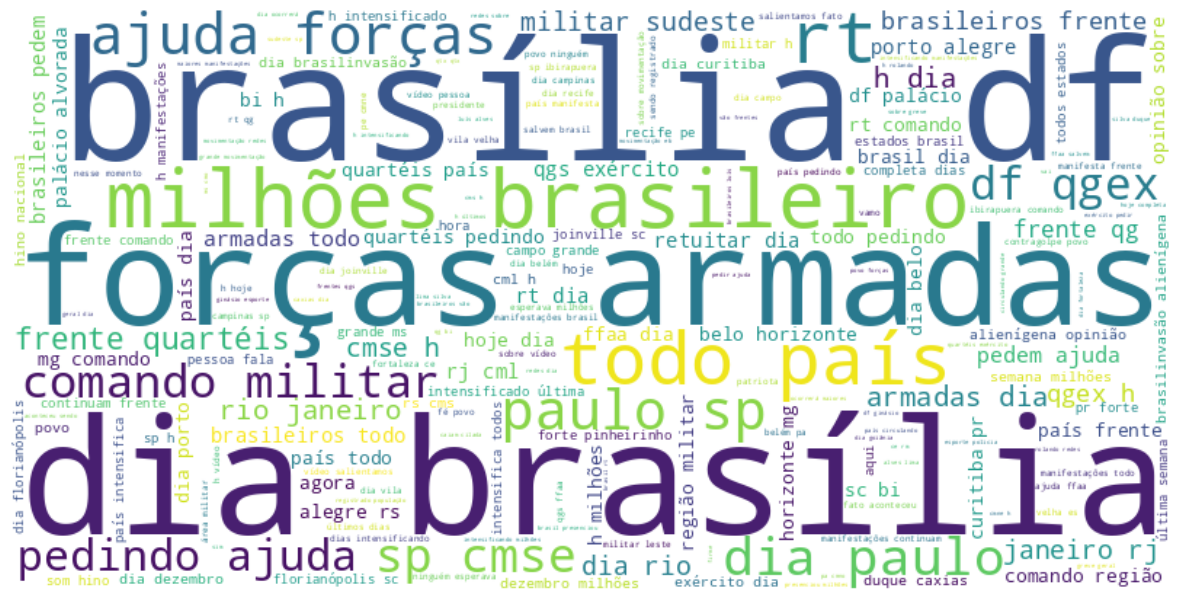

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carregar o DataFrame, se ainda não estiver na memória
df_with_sentiments = pd.read_csv('twitter_data_with_sentiments.csv')

# Certificando-se de que os dados de texto estão em formato string e tratando possíveis NaNs
df_with_sentiments['cleaned_text'] = df_with_sentiments['cleaned_text'].astype(str)

# Concatenação de todas as palavras da coluna 'cleaned_text'
all_text = ' '.join(text for text in df_with_sentiments['cleaned_text'])

# Geração da nuvem de palavras
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_text)

# Visualização da nuvem de palavras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
